# Category Boosting (CatBoost) (Yandex 2017) (Kategorik değişkenler için iyi)
* Kategorik değişkenler ile otomatik olarak mücadelee edebilen hızlı başarılı bir diğer GBM türevi.
* Çok fazla kategorik değişken olduğunda etkilidir. bazen bir columnu one hot encodin yöntemi ile ayırdığımız zamanlarda, çok fazla kategorik değişken oluşmuş oluyor.
* Kategorik değişken desteği.
* Hızlı ve ölçeklenebilir GPU desteği
* Daha başarılı tahminler
* Hızlı train ve hızlı tahmin
* Rusyanın ilk açık kaynak kodlu, başarılı ML çalışması. !

library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('diabetes.csv')
y= df['Outcome']
X= df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


model ve tahmin

In [4]:
!pip install catboost

In [4]:
from catboost import CatBoostClassifier

In [15]:
catb = CatBoostClassifier(task_type="GPU",devices='0:1',verbose=False).fit(X_train,y_train)

In [16]:
?catb

Type:           CatBoostClassifier
String form:    <catboost.core.CatBoostClassifier object at 0x0000020B09D49110>
File:           c:\users\ycanf\anaconda3\lib\site-packages\catboost\core.py
Docstring:     
Implementation of the scikit-learn API for CatBoost classification.

Parameters
----------
iterations : int, [default=500]
    Max count of trees.
    range: [1,+inf)
learning_rate : float, [default value is selected automatically for binary classification with other parameters set to default. In all other cases default is 0.03]
    Step size shrinkage used in update to prevents overfitting.
    range: (0,1]
depth : int, [default=6]
    Depth of a tree. All trees are the same depth.
    range: [1,16]
l2_leaf_reg : float, [default=3.0]
    Coefficient at the L2 regularization term of the cost function.
    range: [0,+inf)
model_size_reg : float, [default=None]
    Model size regularization coefficient.
    range: [0,+inf)
rsm : float, [default=None]
    Subsample ratio of columns whe

In [17]:
catb.score(X_test,y_test)

0.7489177489177489

tune

In [5]:
catb= CatBoostClassifier(verbose=False)

In [6]:
catb_params = {'iterations': [200,500,1000],
              'learning_rate': [0.1,0.003,0.01],
              'depth': [4,5,8]}

In [7]:
catb_cv = GridSearchCV(catb,catb_params,verbose=2,n_jobs=-1,cv=5).fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [8]:
catb_cv.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [10]:
catb= CatBoostClassifier(verbose=False, depth= 8, iterations= 200, learning_rate= 0.01).fit(X_train,y_train)

In [11]:
catb.score(X_test,y_test)

0.7532467532467533

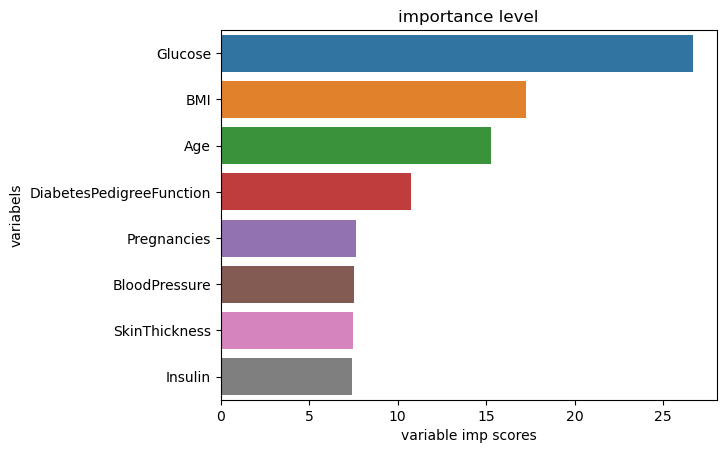

In [12]:
feature_imp = pd.Series(catb.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y= feature_imp.index)
plt.xlabel('variable imp scores')
plt.ylabel('variabels')
plt.title('importance level')
plt.show()